# Data Analysis with Pandas

<a target="_blank" href="https://colab.research.google.com/github/vitostamatti/intro-python/blob/main/notebooks/02-data-analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

- Dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


<!-- 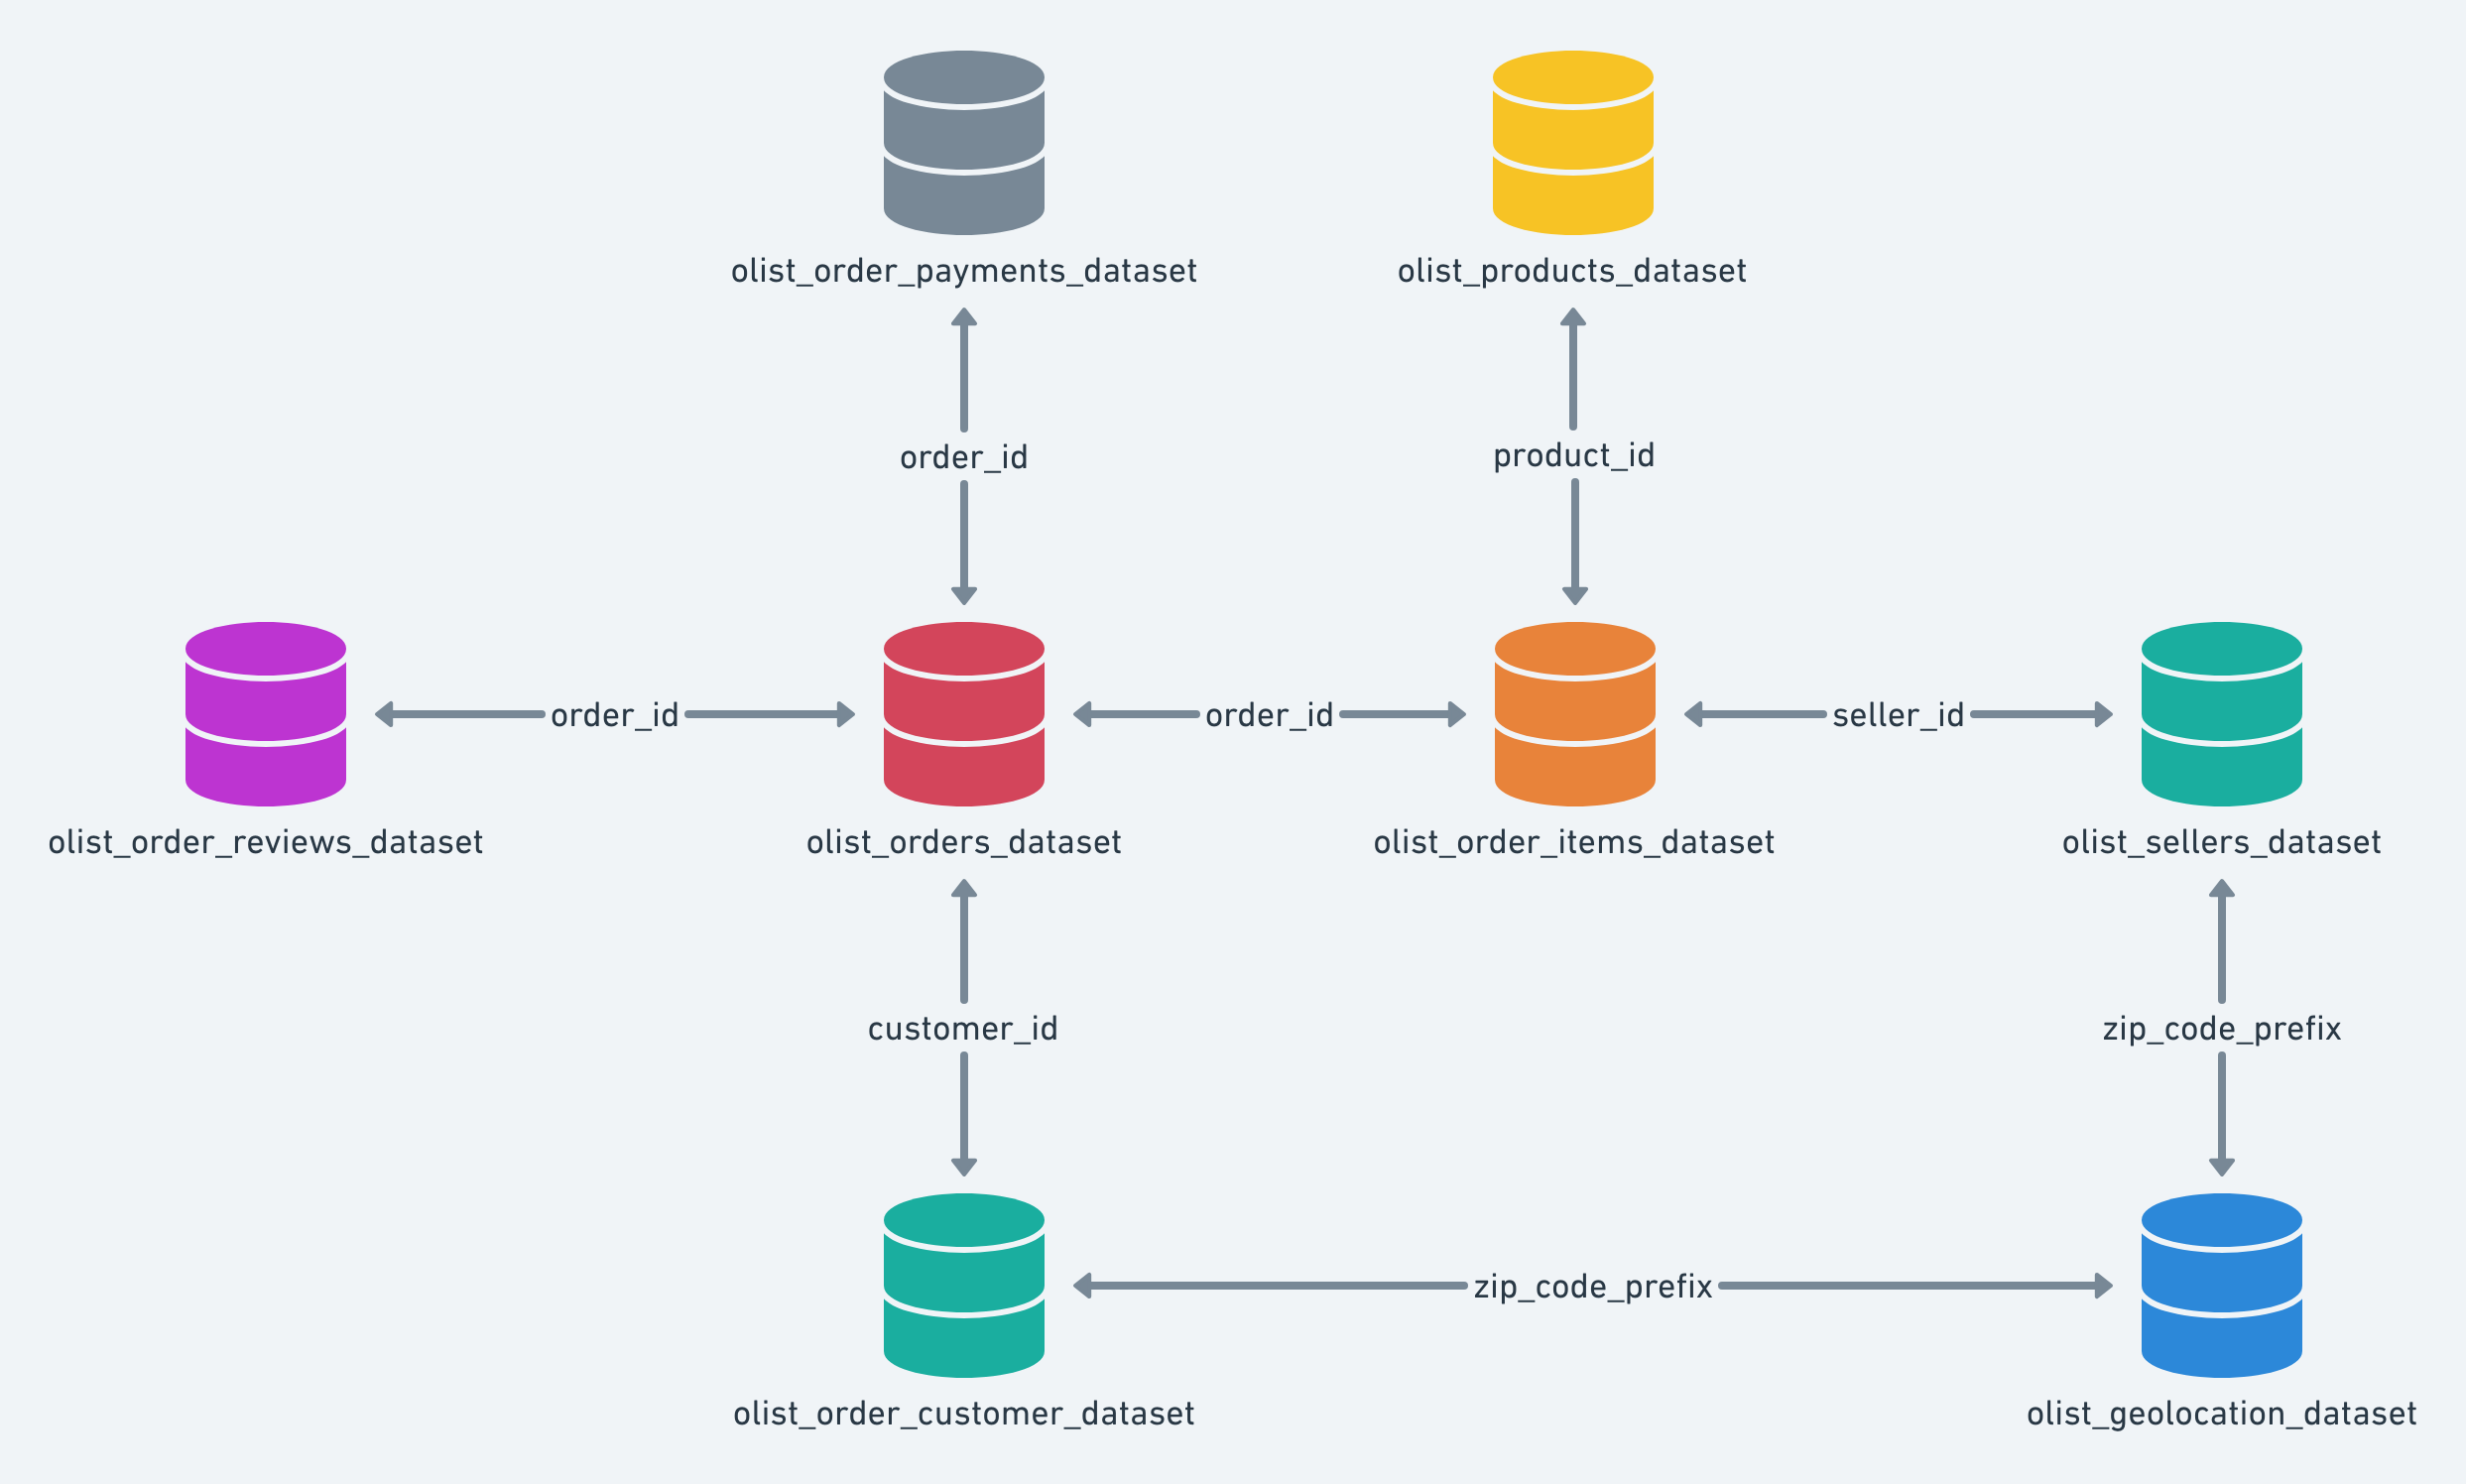 -->

<img src="https://i.imgur.com/HRhd2Y0.png" alt= “” width=800>


- pandas data structure:


<img src="https://www.w3resource.com/w3r_images/pandas-data-structure.svg" width="500" style="background:white">


In [6]:
# load data
base_path = (
    "https://raw.githubusercontent.com/vitostamatti/intro-python/main/data/ecommerce/"
)
olist_customers = pd.read_csv(os.path.join(base_path, "olist_customers_dataset.csv"))
olist_geolocation = pd.read_csv(
    os.path.join(base_path, "olist_geolocation_dataset.csv")
)
olist_order_items = pd.read_csv(
    os.path.join(base_path, "olist_order_items_dataset.csv")
)
olist_order_payments = pd.read_csv(
    os.path.join(base_path, "olist_order_payments_dataset.csv")
)
olist_order_reviews = pd.read_csv(
    os.path.join(base_path, "olist_order_reviews_dataset.csv")
)
olist_orders = pd.read_csv(os.path.join(base_path, "olist_orders_dataset.csv"))
olist_products = pd.read_csv(os.path.join(base_path, "olist_products_dataset.csv"))
olist_sellers = pd.read_csv(os.path.join(base_path, "olist_sellers_dataset.csv"))
product_category_name_translation = pd.read_csv(
    os.path.join(base_path, "product_category_name_translation.csv")
)

In [7]:
# show top n rows
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [43]:
# basic statistics
olist_products.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [51]:
# accessing columns
olist_products["product_category_name"]
olist_products.product_category_name
pass

In [52]:
# accessing loc/iloc
olist_products.loc[:, "product_category_name"]  # loc[[index_names],[column_names]]
olist_products.iloc[:, 1]  # iloc[[index positions],[column positions]]
pass

In [58]:
# basic operations
olist_products["product_weight_g"].mean()
olist_products["product_weight_g"].max()
olist_products["product_weight_g"].min()
olist_products["product_weight_g"].std()
olist_products["product_weight_g"].median()
# many more...
pass

In [143]:
# column operations
olist_products["product_weight_g"] / 1000  # weight_kg
olist_products["product_height_cm"] * olist_products[
    "product_length_cm"
] * olist_products[
    "product_width_cm"
]  # product_volumen
pass

In [142]:
# new columns
olist_products["product_weight_kg"] = olist_products["product_weight_g"] / 1000
olist_products["product_volumen"] = (
    olist_products["product_height_cm"]
    * olist_products["product_length_cm"]
    * olist_products["product_width_cm"]
)  # product_volumen
pass

0     2240.0
1    10800.0
2     2430.0
3     2704.0
4     4420.0
Name: product_volumen, dtype: float64

In [141]:
# operations over rows
mean_weight = olist_products["product_volumen"].mean()
olist_products["is_big_product"] = olist_products["product_volumen"].apply(
    lambda x: True if x > 2 * mean_weight else False
)  # is above mean volumen
pass

20584    False
26571    False
31172    False
1569     False
11959     True
16558     True
25438    False
14354    False
32654    False
30356    False
Name: is_big_product, dtype: bool

In [144]:
# groups
olist_products.groupby("product_category_name")[["product_weight_g"]].mean()
olist_products.groupby(["product_category_name", "is_big_product"])[
    ["product_weight_g"]
].mean()
olist_products.groupby(["product_category_name", "is_big_product"]).agg(
    {"product_weight_g": "mean"}
)
pass

In [145]:
# pivots
olist_products.pivot_table(
    columns="is_big_product",
    index=["product_category_name"],
    values="product_weight_g",
    aggfunc="count",
)
pass

In [110]:
# joins
geolocation_agg = (
    olist_geolocation.groupby("geolocation_zip_code_prefix")[
        ["geolocation_lat", "geolocation_lng"]
    ]
    .mean()
    .reset_index()
)
customers_geo = olist_customers.merge(
    geolocation_agg[
        ["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"]
    ],
    left_on=["customer_zip_code_prefix"],
    right_on=["geolocation_zip_code_prefix"],
    how="left",
)

<Axes: title={'center': 'N Order Purchases by Day in 2017'}, xlabel='order_purchase_date'>

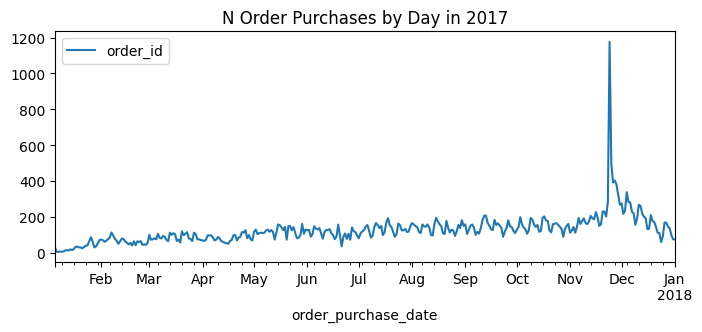

In [161]:
# plots
olist_orders["order_purchase_timestamp"] = pd.to_datetime(
    olist_orders["order_purchase_timestamp"]
)
olist_orders["order_purchase_date"] = pd.to_datetime(
    olist_orders["order_purchase_timestamp"].dt.date
)
(
    olist_orders.groupby("order_purchase_date")[["order_id"]]
    .count()
    .loc["2017-01-01":"2018-01-01"]
    .plot(figsize=(8, 3), title="N Order Purchases by Day in 2017")
)

<Axes: title={'center': 'N Producs by Category'}, ylabel='product_category_name'>

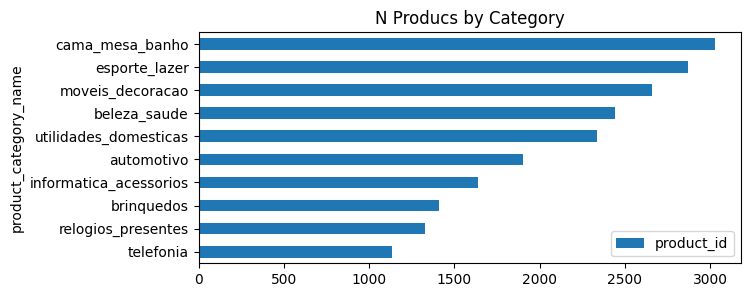

In [164]:
(
    olist_products.groupby("product_category_name")[["product_id"]]
    .count()
    .sort_values("product_id")[-10:]
    .plot(figsize=(7, 3), kind="barh", title="N Producs by Category")
)

In [176]:
# olist_order_reviews
olist_order_payments
olist_order_items[["order_id", "product_id", "price"]]
# olist_products[['product_id','product_category_name']]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
